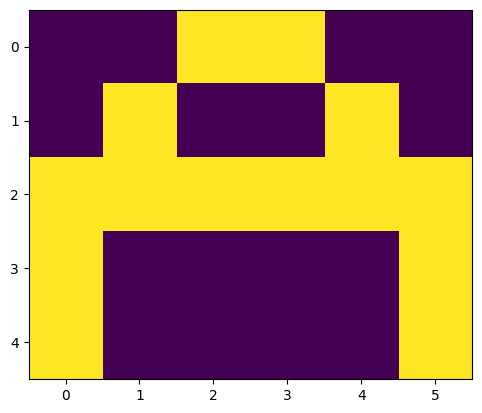

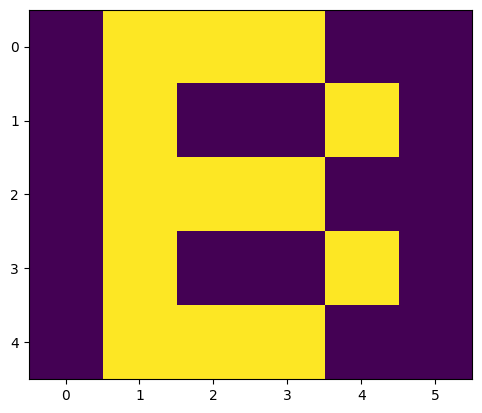

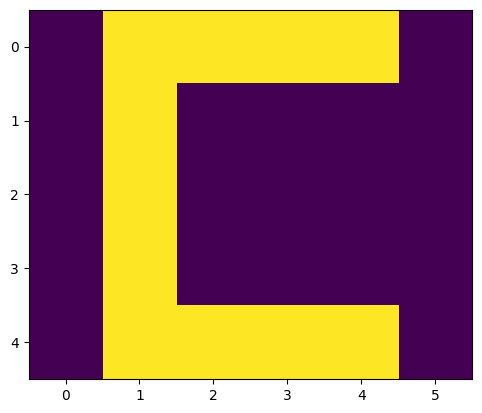

In [17]:
## https://www.geeksforgeeks.org/implementation-of-neural-network-from-scratch-using-numpy/

import numpy as np
import matplotlib.pyplot as plt

# Creating data set

# A
a = [
    0, 0, 1, 1, 0, 0,
    0, 1, 0, 0, 1, 0,
    1, 1, 1, 1, 1, 1,
    1, 0, 0, 0, 0, 1,
    1, 0, 0, 0, 0, 1
]
# B
b = [
    0, 1, 1, 1, 0, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 0, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 0, 0
]
# C
c = [
    0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 1, 1, 1, 0
]

# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]

import numpy as np
import matplotlib.pyplot as plt
# visualizing the data, plotting A.
plt.imshow(np.array(a).reshape(5, 6))
plt.show()
plt.imshow(np.array(b).reshape(5, 6))
plt.show()
plt.imshow(np.array(c).reshape(5, 6))
plt.show()


In [7]:
x = [
    np.array(a).reshape(1, 30),
    np.array(b).reshape(1, 30),
    np.array(c).reshape(1, 30),
]
y = np.array(y)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [8]:
# activation function

def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# out put of layer 2

	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))

# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):

	# hidden layer
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# output of layer 2

	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
								(np.multiply(a1, 1-a1)))

	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)

	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))

	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show()




In [9]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)


[[-1.82917534e+00  6.98933943e-01  6.31990490e-01  8.73487755e-01
  -6.35033730e-01]
 [-2.23343220e-01 -1.66817044e+00  1.44127420e+00 -8.35076623e-01
   4.40654431e-01]
 [-3.23633080e-02 -6.63915003e-01  1.21897800e+00 -6.36874817e-01
  -4.89092142e-02]
 [ 6.70179801e-01 -4.26553697e-01  3.96708283e-01 -1.07787485e+00
  -5.06709655e-01]
 [ 5.79520182e-01  1.26984093e+00  1.27385943e-02 -7.42845572e-01
   2.11687409e+00]
 [ 1.43999154e+00 -6.00473661e-01  1.19243003e+00  9.65682837e-01
  -8.99971193e-01]
 [-5.58888622e-01 -3.66689594e-01 -2.82418960e-01 -6.49984130e-01
   4.56334201e-01]
 [ 6.12039234e-01 -2.55115815e-01  6.01390969e-01  2.74987284e+00
   1.12750671e+00]
 [-1.49173452e+00 -1.08504731e+00 -4.72779756e-01 -1.36884414e+00
   1.68700969e-01]
 [-5.88728358e-04 -4.73940711e-01 -6.27868325e-01  2.97748174e-01
  -9.57583667e-01]
 [ 3.02207725e-01  1.13377049e-01 -1.22586072e+00  3.29383425e-01
   4.53776260e-01]
 [ 5.77509561e-01  1.92485193e+00  7.32465893e-01 -6.20589049e-01

In [10]:
"""The arguments of train function are data set list x,
correct labels y, weights w1, w2, learning rate = 0.1,
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of
trained weights w1, w2"""

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)


epochs: 1 ======== acc: 73.14081612039398
epochs: 2 ======== acc: 76.5857278687159
epochs: 3 ======== acc: 79.08931561799561
epochs: 4 ======== acc: 80.98246755733211
epochs: 5 ======== acc: 82.47138957832844
epochs: 6 ======== acc: 83.67589645221074
epochs: 7 ======== acc: 84.67156795343118
epochs: 8 ======== acc: 85.51096595778311
epochs: 9 ======== acc: 86.23294060408534
epochs: 10 ======== acc: 86.8670048615862
epochs: 11 ======== acc: 87.43580249703137
epochs: 12 ======== acc: 87.95674312326125
epochs: 13 ======== acc: 88.44314713574167
epochs: 14 ======== acc: 88.90501624918316
epochs: 15 ======== acc: 89.34949915969348
epochs: 16 ======== acc: 89.78114511167755
epochs: 17 ======== acc: 90.20209117854547
epochs: 18 ======== acc: 90.6123686739034
epochs: 19 ======== acc: 91.01047328044339
epochs: 20 ======== acc: 91.3941834722604
epochs: 21 ======== acc: 91.76141022789349
epochs: 22 ======== acc: 92.11079061228762
epochs: 23 ======== acc: 92.44187803249588
epochs: 24 ======== acc:

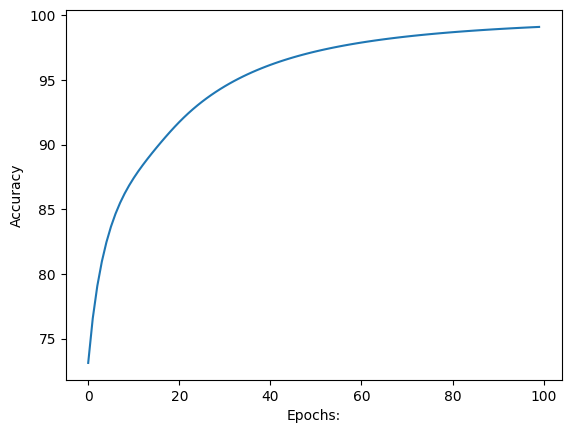

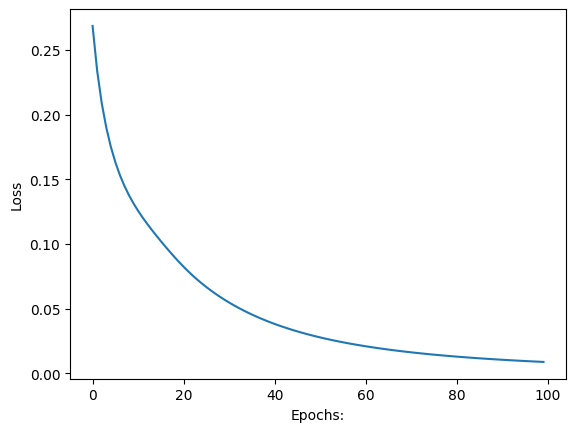

In [11]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()


In [12]:
# the trained weights are
print(w1, "\n", w2)


[[-1.82917534e+00  6.98933943e-01  6.31990490e-01  8.73487755e-01
  -6.35033730e-01]
 [-1.42102296e-01 -1.91951940e+00  2.14874385e+00 -8.35894701e-01
   3.91575209e-01]
 [ 9.16120546e-02 -4.63169142e-01  1.39654510e+00 -6.46964481e-01
  -1.01109360e-01]
 [ 7.94155163e-01 -2.25807836e-01  5.74275377e-01 -1.08796452e+00
  -5.58909801e-01]
 [ 3.05794873e-01  1.99685242e+00  1.59896471e-01 -7.46112412e-01
   2.06374533e+00]
 [ 1.43999154e+00 -6.00473661e-01  1.19243003e+00  9.65682837e-01
  -8.99971193e-01]
 [-5.58888622e-01 -3.66689594e-01 -2.82418960e-01 -6.49984130e-01
   4.56334201e-01]
 [ 7.36014597e-01 -5.43699541e-02  7.78958064e-01  2.73978318e+00
   1.07530657e+00]
 [-1.49173452e+00 -1.08504731e+00 -4.72779756e-01 -1.36884414e+00
   1.68700969e-01]
 [-5.88728358e-04 -4.73940711e-01 -6.27868325e-01  2.97748174e-01
  -9.57583667e-01]
 [ 6.99908397e-01 -4.12888587e-01 -1.19545150e+00  3.22560601e-01
   4.54704872e-01]
 [ 5.77509561e-01  1.92485193e+00  7.32465893e-01 -6.20589049e-01

Image is of letter B.


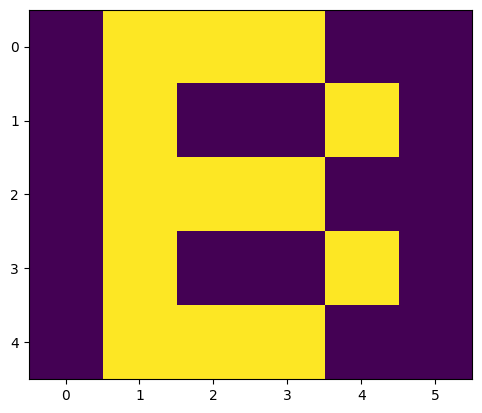

In [16]:
"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[1], w1, w2)
